# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

## The Outline Will be as Follows
* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("insurance_claimss.csv")

In [12]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Missing Values

In [13]:
null_counts = df.isnull().sum()
null_counts

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [14]:
df_new = df.drop("_c39", axis = 1)

In [15]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [16]:
df_new.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


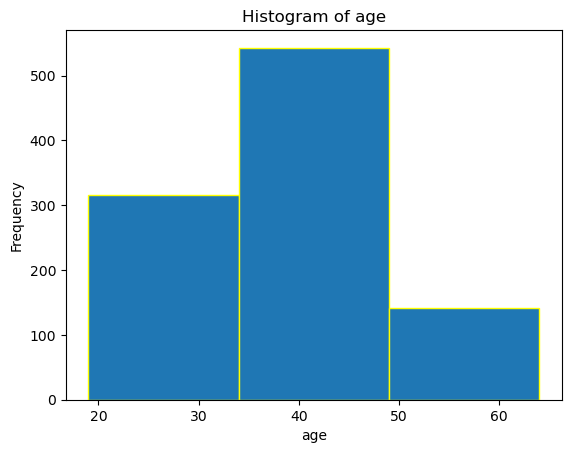

In [18]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='Yellow')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [19]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [20]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


In [21]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [22]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [23]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [24]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [25]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [26]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [27]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [28]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Saving the csv for late

In [51]:
df_new.to_csv('Advanced Features Claims Data.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations